## Create dataframe

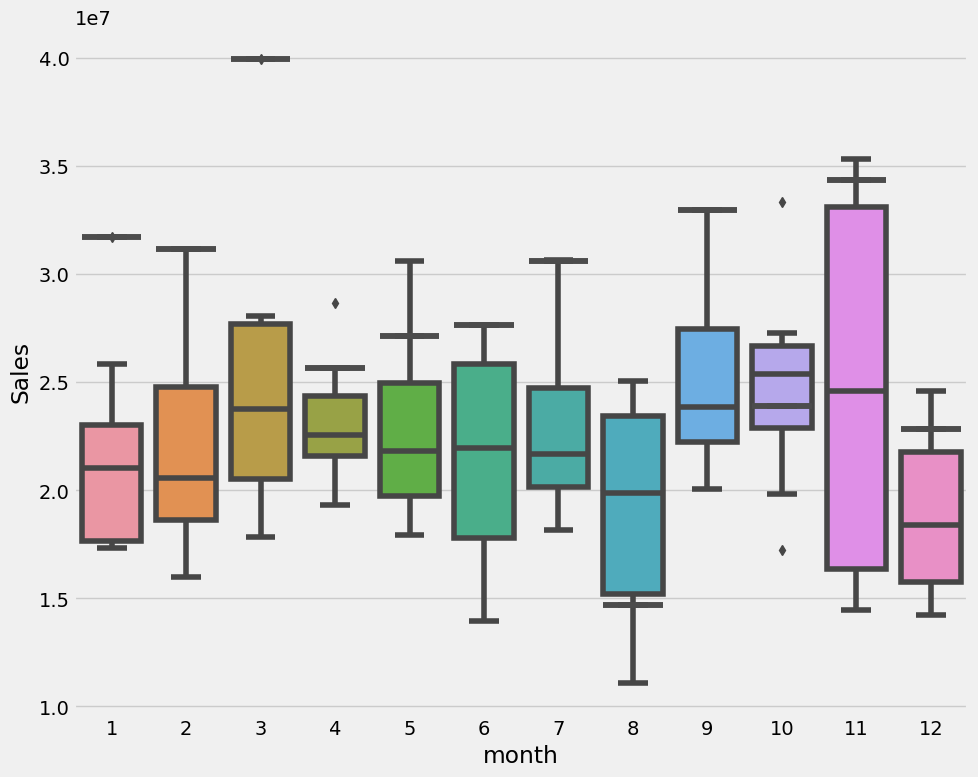

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from timeseries_boosted import  createTimeSeriesDf, plotDataSummary, addLags
from sklearn.model_selection import TimeSeriesSplit

color_pal = sns.color_palette()

features = ['quarter', 'month', 'lag1','lag2','lag3']
target = 'Sales'
cutoffDate = '01-01-2020'

df = createTimeSeriesDf('C:/Users/janyl/safemed_2.xlsx')
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
# Create the first plot with full width

sns.boxplot(data=df, x='month', y='Sales', ax=axs)
sns.boxplot(data=df.loc[df.index.year==2021], x='month', y='Sales', ax=axs, color='red')

fig.tight_layout()

plt.show()


,Sales,quarter,month,year
Date,,,,
2021-01-01,31690055.12,1,1,2021
2021-02-01,31157786.40,1,2,2021
2021-03-01,39928890.67,1,3,2021
2021-04-01,25629571.70,2,4,2021
2021-05-01,27122135.03,2,5,2021
2021-06-01,27635966.69,2,6,2021
2021-07-01,30578010.06,3,7,2021
2021-08-01,14678815.32,3,8,2021
2021-09-01,32975860.80,3,9,2021


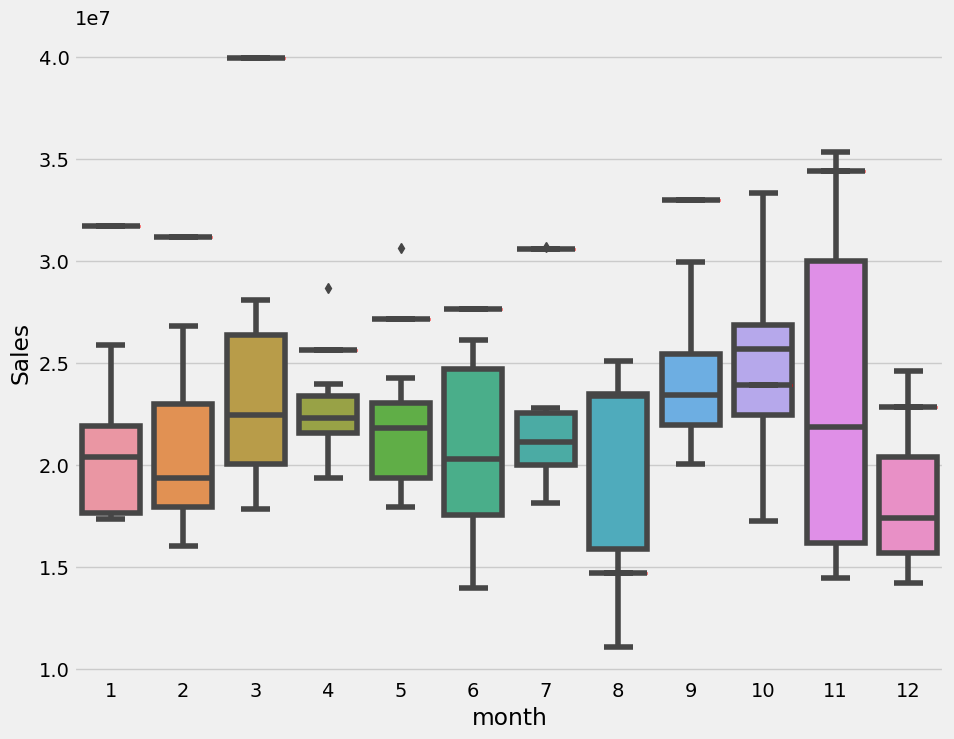

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), sharex=True)
boxprops = {'edgecolor': 'red', 'linewidth': 2}

sns.boxplot(data=df.loc[df.index.year!=2021], x='month', y='Sales', ax=axs)
sns.boxplot(data=df.loc[df.index.year==2021], x='month', y='Sales', ax=axs, boxprops=boxprops)
df.loc[df.index.year==2021]

explore

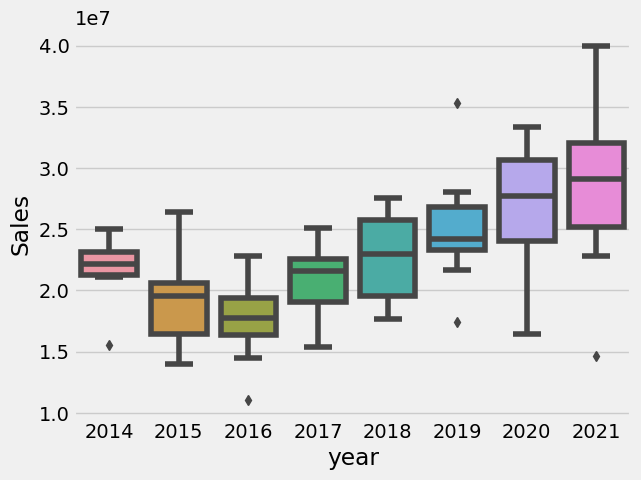

In [2]:
sns.boxplot(data=df, x='year', y='Sales')
plt.show()

## Predict & Plot the fitted data

<AxesSubplot:xlabel='day', ylabel='total_bill'>

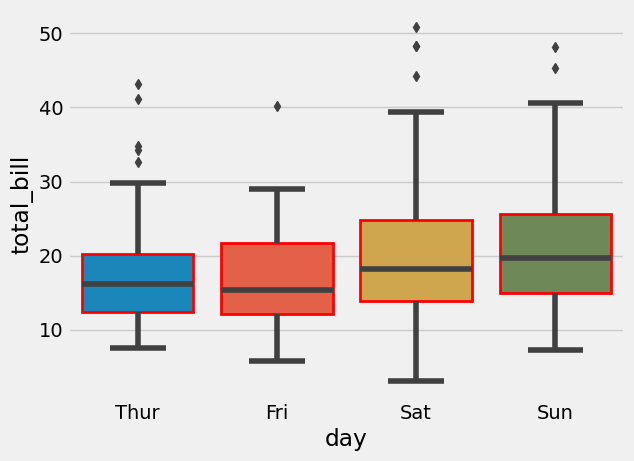

In [38]:
import seaborn as sns

# Load the tips dataset
tips = sns.load_dataset("tips")

# Set the color of the outline of the boxplot
boxprops = {'edgecolor': 'red', 'linewidth': 2}

# Plot the boxplot
sns.boxplot(x="day", y="total_bill", data=tips, boxprops=boxprops)

# Show the plot


## Predict the future

In [127]:
X_all = df[features]
y_all = df[target]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                        n_estimators=1000,
                        early_stopping_rounds=50,
                        objective='reg:squarederror',
                        max_depth=5,
                        learning_rate=0.01)
reg.fit(X_all, y_all,
            eval_set=[(X_all, y_all), (X_all, y_all)],
            verbose=False);

future = pd.date_range(df.index.max() + pd.offsets.MonthBegin(1), periods = 4, freq='MS')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df_and_future = pd.concat([df, future_df])
df_and_future['isFuture'] = df_and_future['isFuture'].fillna(False)

df_and_future = addLags(df_and_future)
X_all_and_future = df_and_future[features]
y_all_and_future = df_and_future[target]
df_and_future['pred'] = reg.predict(X_all_and_future)
df_and_future
future_df = df_and_future.query('isFuture').copy()


## Plot future

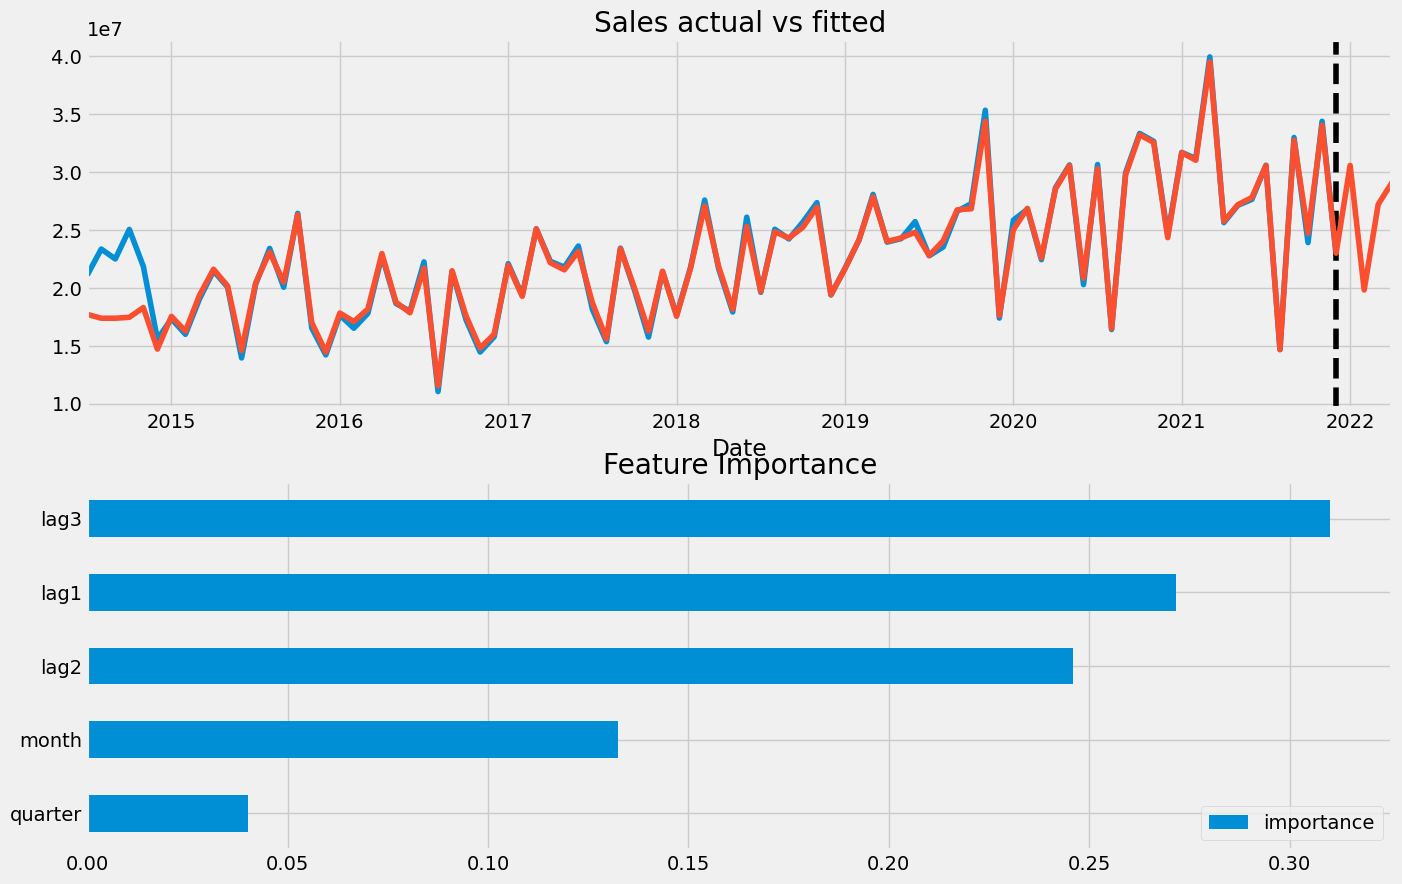

In [126]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
df['Sales'].plot(ax=ax[0],
                        label='Existing',
                        title=f'Sales actual vs fitted')
ax[0].axvline(df.index.max(), color='black', ls='--')
df_and_future['pred'].plot(ax=ax[0],
                        label='Prediction')

fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance', ax=ax[1])
plt.show()